<a href="https://colab.research.google.com/github/jasur-rasulov/New-York-City-Taxi-Fare-Forecasting/blob/master/IDS561_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## *Loading the Train and Test Datasets*

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
% matplotlib inline
plt.style.use('seaborn-whitegrid')
import sklearn

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
train = pd.read_csv("/content/drive/Team Drives/IDS 561 - Big Data Group Project/ny_fare_train.csv")
test = pd.read_csv("/content/drive/Team Drives/IDS 561 - Big Data Group Project/ny_fare_test.csv")

In [0]:
print(train.shape, test.shape)

(199999, 8) (54174, 8)


In [0]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [0]:
test.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,14:53.0,5.5,2014-03-03 11:14:53 UTC,-73.980647,40.721606,-73.994044,40.727628,1
1,35:54.0,6.0,2015-03-14 13:35:54 UTC,-73.958839,40.815304,-73.966675,40.804443,4
2,43:51.0,8.1,2010-05-24 23:43:51 UTC,-73.985327,40.760201,-73.981010,40.744734,1
3,53:08.0,8.5,2015-03-09 16:53:08 UTC,-73.982170,40.768639,-73.992203,40.743530,1
4,15:00.0,6.9,2011-11-25 22:15:00 UTC,-74.005458,40.741027,-74.004225,40.720920,1


## ***Checking Data Types***
---

In [0]:
train.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

##**Examining the number of missing values for each column on both datasets**
---

In [0]:
print(train.isnull().sum())

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64


In [0]:
print(test.isnull().sum())

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    2
dropoff_latitude     2
passenger_count      0
dtype: int64


## ***Deleting Missing Values***

---

In [0]:
train = train.dropna(how = 'any', axis = 'rows')
test = test.dropna(how = 'any', axis = 'rows')

## ***Data Engineering***

---

### ***Creating a function to represent the absolute difference (Manhattan distance) between the pickup and dropoff locations***

---

In [0]:
def add_travel_vector_features(df):
    df['abs_diff_longitude'] = (df.dropoff_longitude - df.pickup_longitude).abs()
    df['abs_diff_latitude'] = (df.dropoff_latitude - df.pickup_latitude).abs()

add_travel_vector_features(train)

### ***Converting the Values of Pickup_Datetime to Year, Month, Date, Day of Week, and Hour Columns***

---

In [0]:
train['pickup_datetime']  = pd.to_datetime(train['pickup_datetime'])
test['pickup_datetime']  = pd.to_datetime(test['pickup_datetime'])
data = [train,test]
for i in data:
    i['Year'] = i['pickup_datetime'].dt.year
    i['Month'] = i['pickup_datetime'].dt.month
    i['Date'] = i['pickup_datetime'].dt.day
    i['Day of Week'] = i['pickup_datetime'].dt.dayofweek
    i['Hour'] = i['pickup_datetime'].dt.hour

In [0]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_diff_longitude,abs_diff_latitude,Year,Month,Date,Day of Week,Hour
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,0.002701,0.009041,2009,6,15,0,17
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,0.036780,0.070701,2010,1,5,1,16
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,0.008504,0.010708,2011,8,18,3,0
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,0.004437,0.024949,2012,4,21,5,4
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,0.011440,0.015754,2010,3,9,1,7


## ***Exploratory Data Analysis (EDA)***

---

#### ***Distribution of Fare Amount***

---

Text(0.5, 1.0, 'Distribution of Fare')

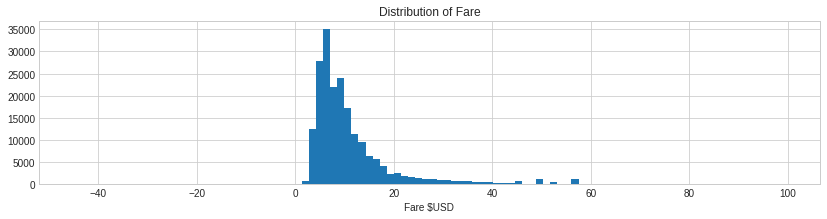

In [0]:
train[train.fare_amount<100].fare_amount.hist(bins=100, figsize=(14,3))
plt.xlabel('Fare $USD')
plt.title('Distribution of Fare')

#### ***Heatmap of Pickup and Dropoff Locations***
---

In [0]:
def plot_on_map(df, BB, nyc_map, s=10, alpha=0.2):
    fig, axs = plt.subplots(1, 2, figsize=(16,10))
    axs[0].scatter(df.pickup_longitude, df.pickup_latitude, zorder=1, alpha=alpha, c='r', s=s)
    axs[0].set_xlim((BB[0], BB[1]))
    axs[0].set_ylim((BB[2], BB[3]))
    axs[0].set_title('Pickup locations')
    axs[0].imshow(nyc_map, zorder=0, extent=BB)

    axs[1].scatter(df.dropoff_longitude, df.dropoff_latitude, zorder=1, alpha=alpha, c='r', s=s)
    axs[1].set_xlim((BB[0], BB[1]))
    axs[1].set_ylim((BB[2], BB[3]))
    axs[1].set_title('Dropoff locations')
    axs[1].imshow(nyc_map, zorder=0, extent=BB)

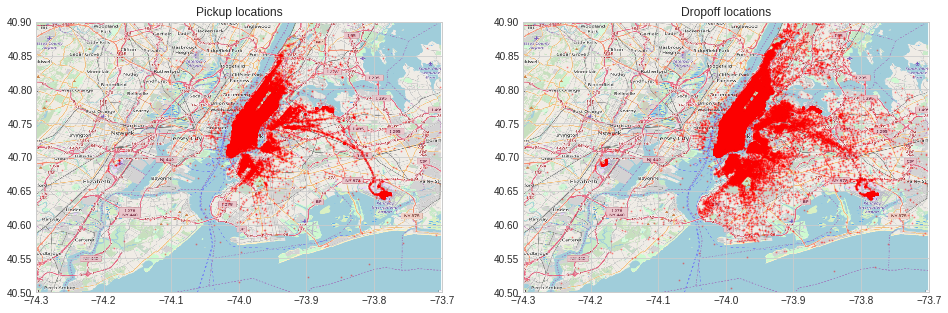

In [0]:
NY_zoom = (-74.3, -73.7, 40.5, 40.9)
nyc_map_zoom = plt.imread('https://aiblog.nl/download/nyc_-74.3_-73.7_40.5_40.9.png')
plot_on_map(train, NY_zoom, nyc_map_zoom, s=1, alpha=0.3)

### *Frequency Distributions by Hour, Week, and Month* 

In [0]:
def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295 # Pi/180
    a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p)) / 2
    return 0.6213712 * 12742 * np.arcsin(np.sqrt(a))

train['distance_miles'] = distance(train.pickup_latitude, train.pickup_longitude, \
                                      train.dropoff_latitude, train.dropoff_longitude)

Text(0, 0.5, 'Frequency')

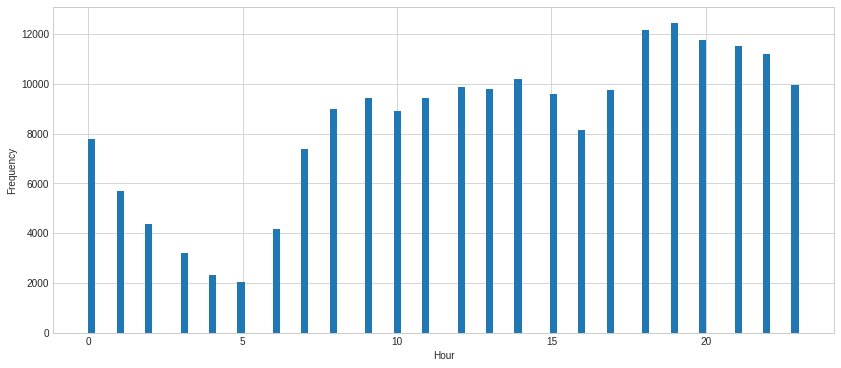

In [0]:
plt.figure(figsize=(14,6))
plt.hist(train['Hour'], bins=100)
plt.xlabel('Hour')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

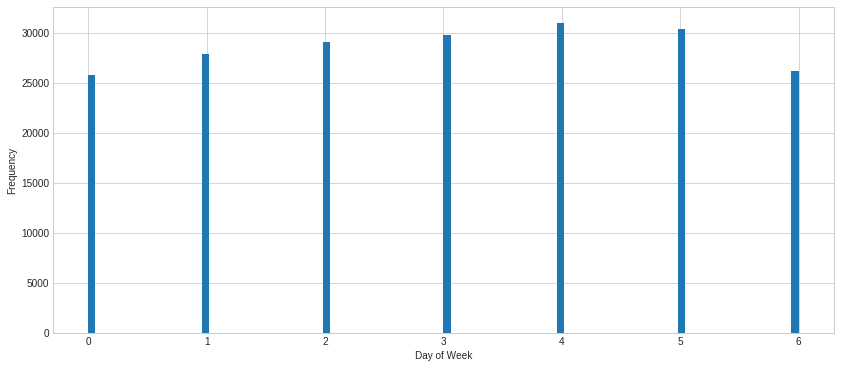

In [0]:
plt.figure(figsize=(14,6))
plt.hist(train['Day of Week'], bins=100)
plt.xlabel('Day of Week')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

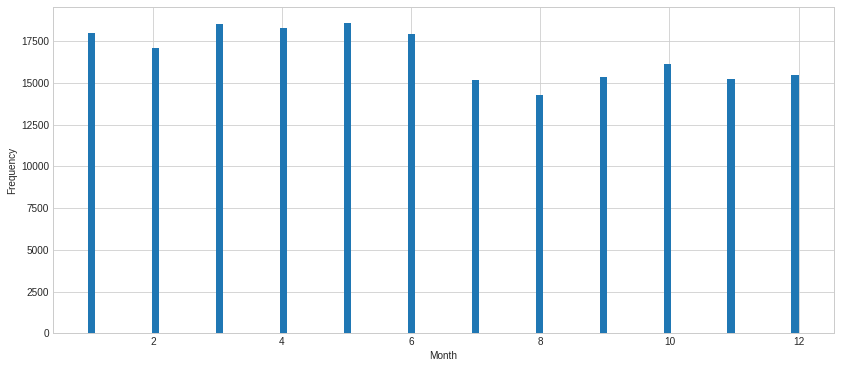

In [0]:
plt.figure(figsize=(14,6))
plt.hist(train['Month'], bins=100)
plt.xlabel('Month')
plt.ylabel('Frequency')

## *Machine Learning Algortihms*

---

### Pre-Processing the Data for Modeling

In [0]:
labels = np.array(train['fare_amount'])
train1 = train.drop('fare_amount', axis = 1)
train1 = train1.drop('pickup_datetime', axis = 1)
train1 = train1.drop('key', axis = 1)
attributes_list = list(train1.columns)
train_rf = np.array(train1)

In [0]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(train1, labels, test_size = 0.2, random_state = 42)

### *Linear Regression*

---

In [0]:
def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295 # Pi/180
    a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p)) / 2
    return 0.6213712 * 12742 * np.arcsin(np.sqrt(a)) 

In [0]:
train['distance_miles'] = distance(train.pickup_latitude, train.pickup_longitude, \
                                      train.dropoff_latitude, train.dropoff_longitude)

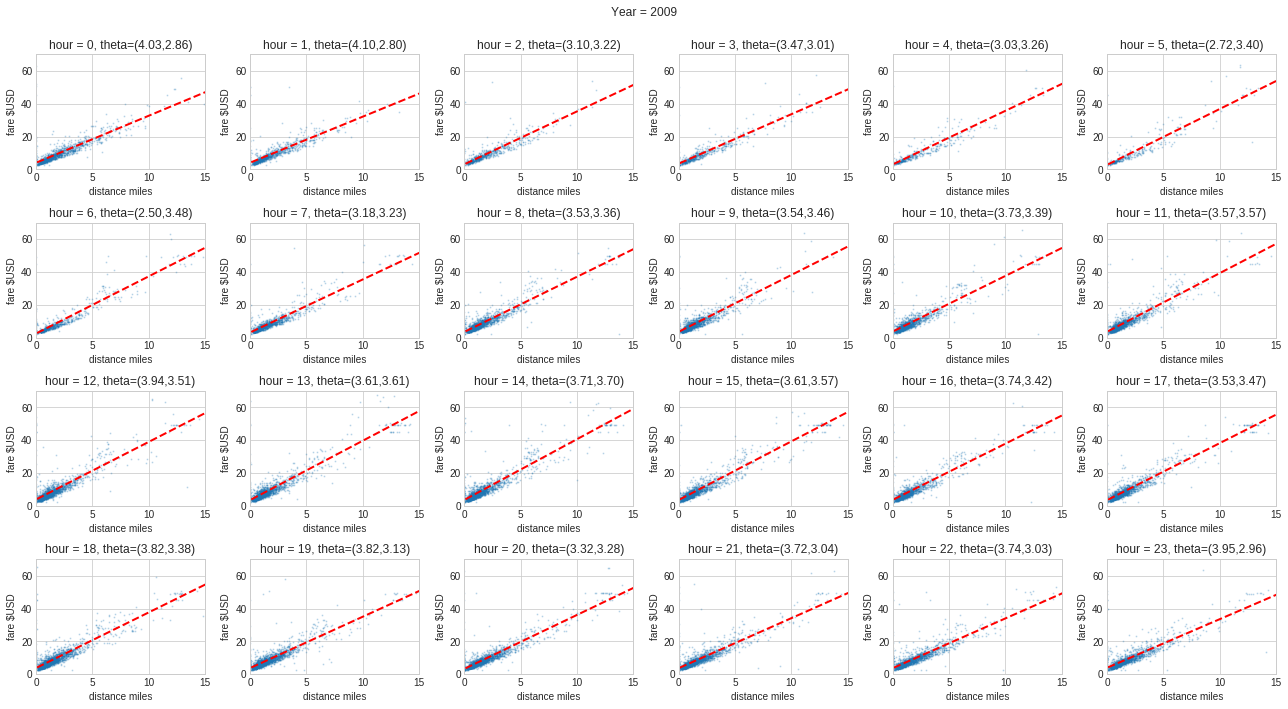

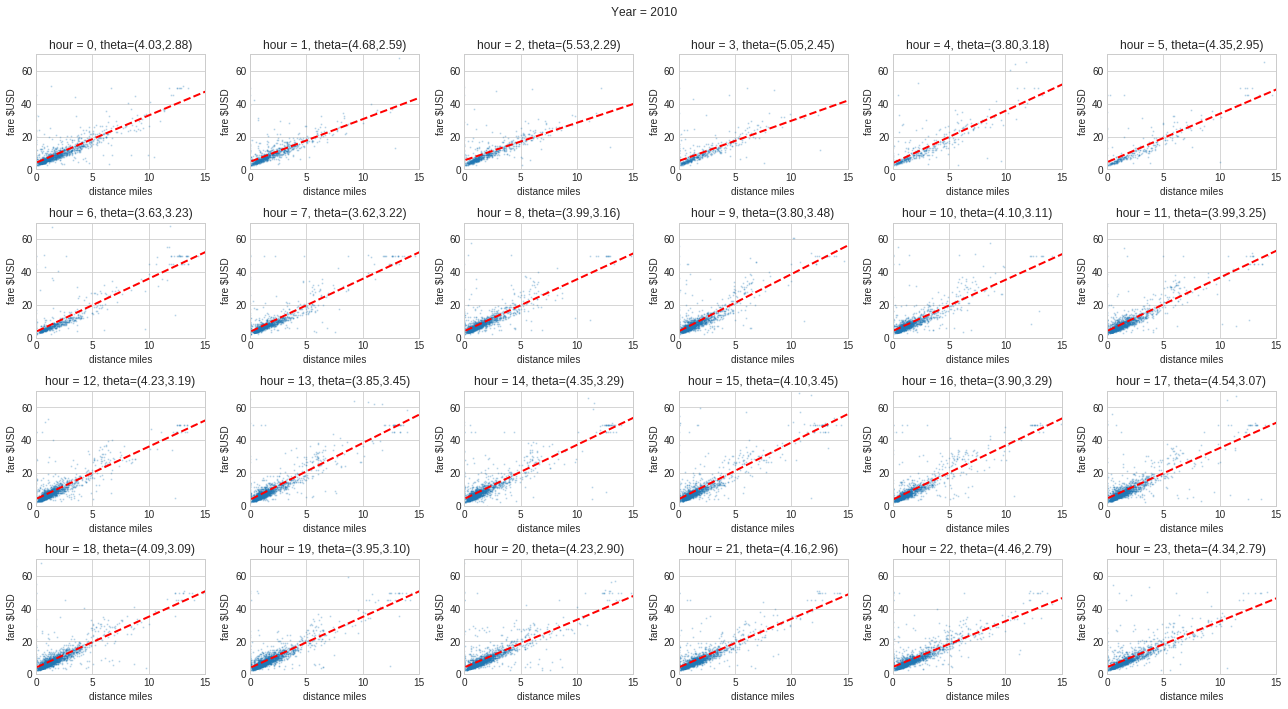

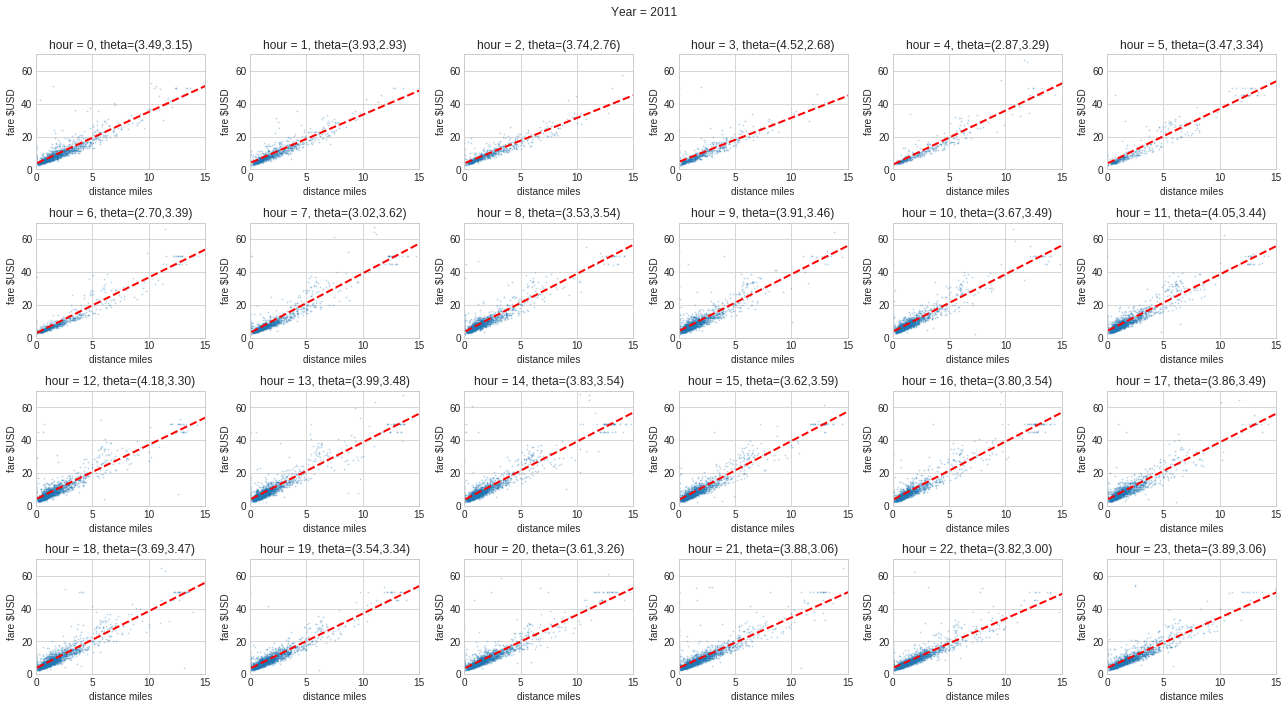

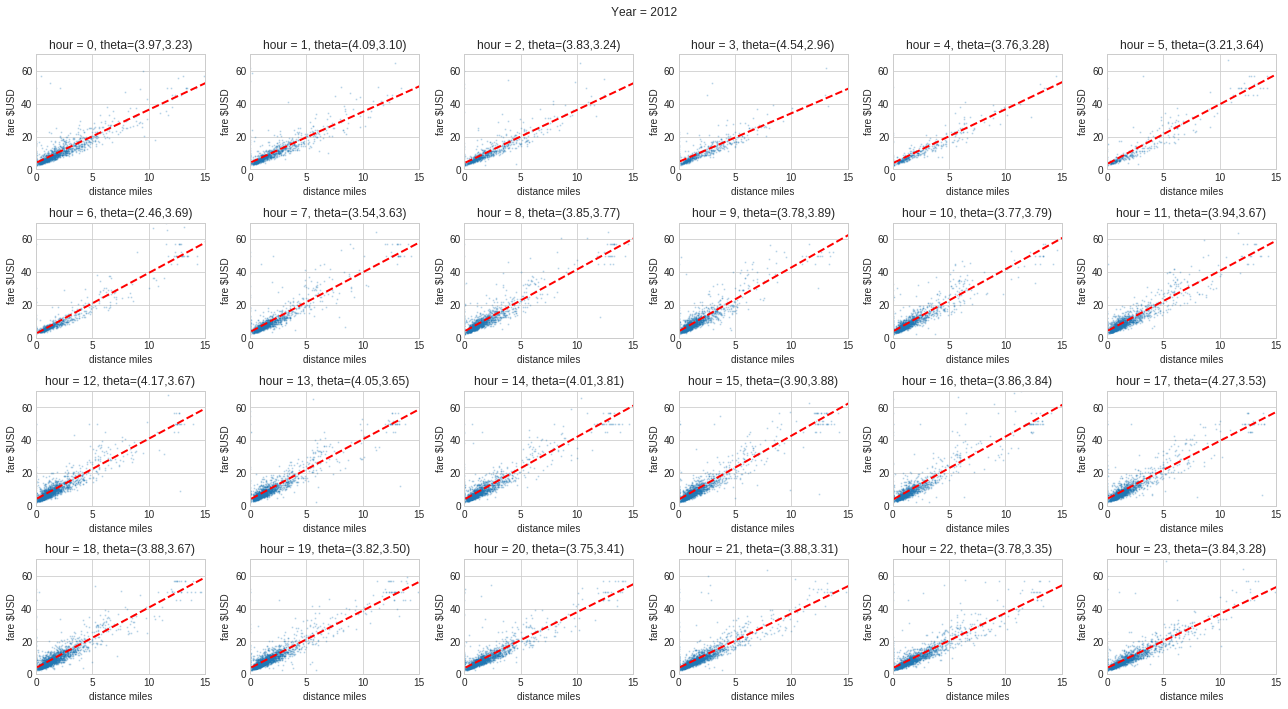

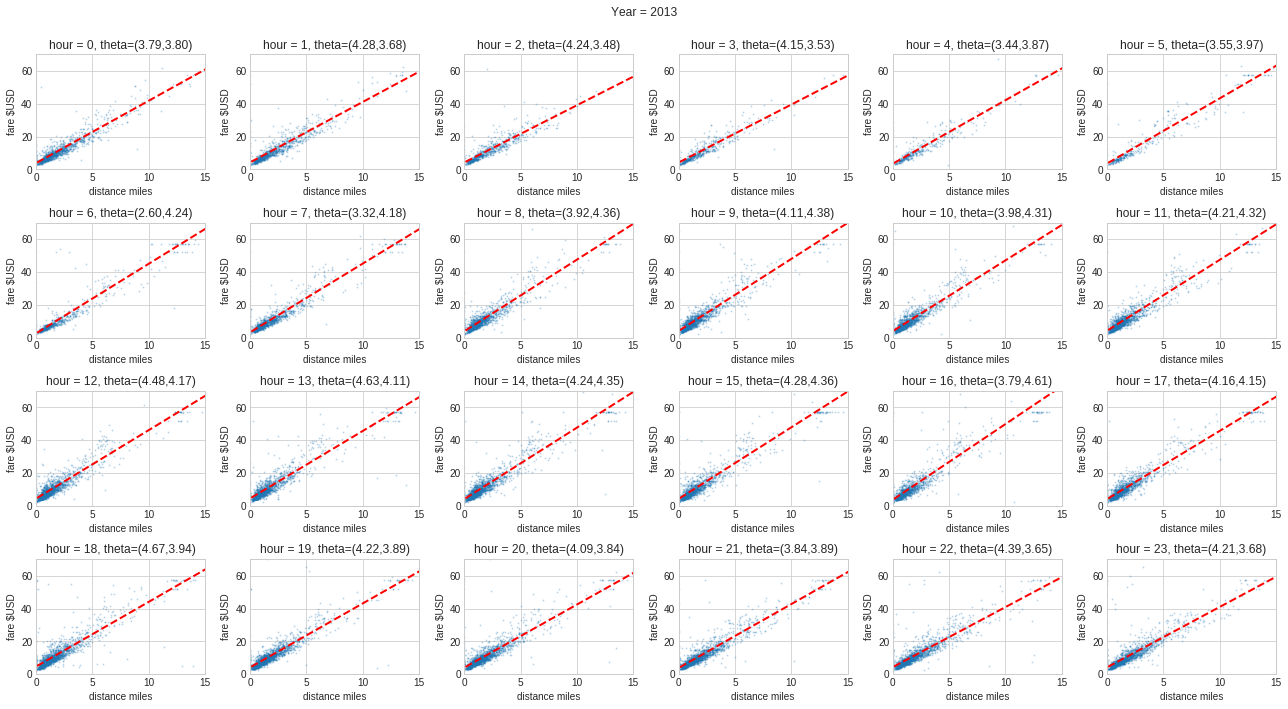

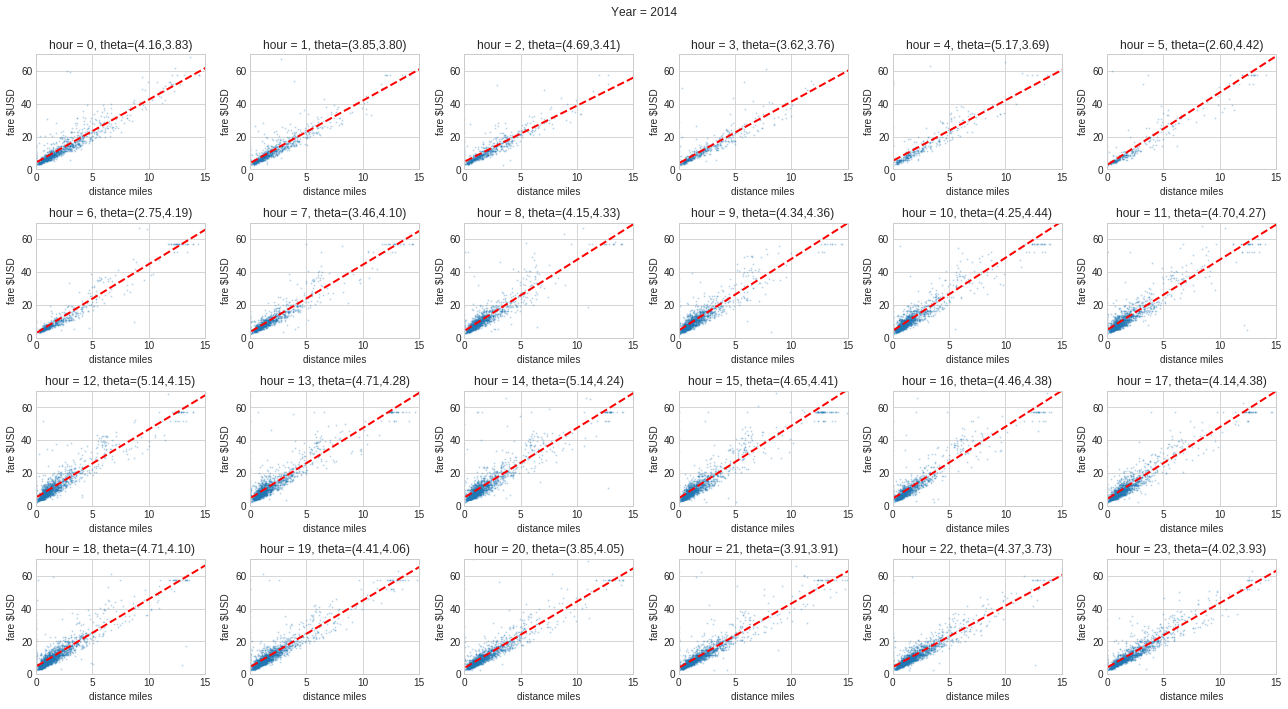

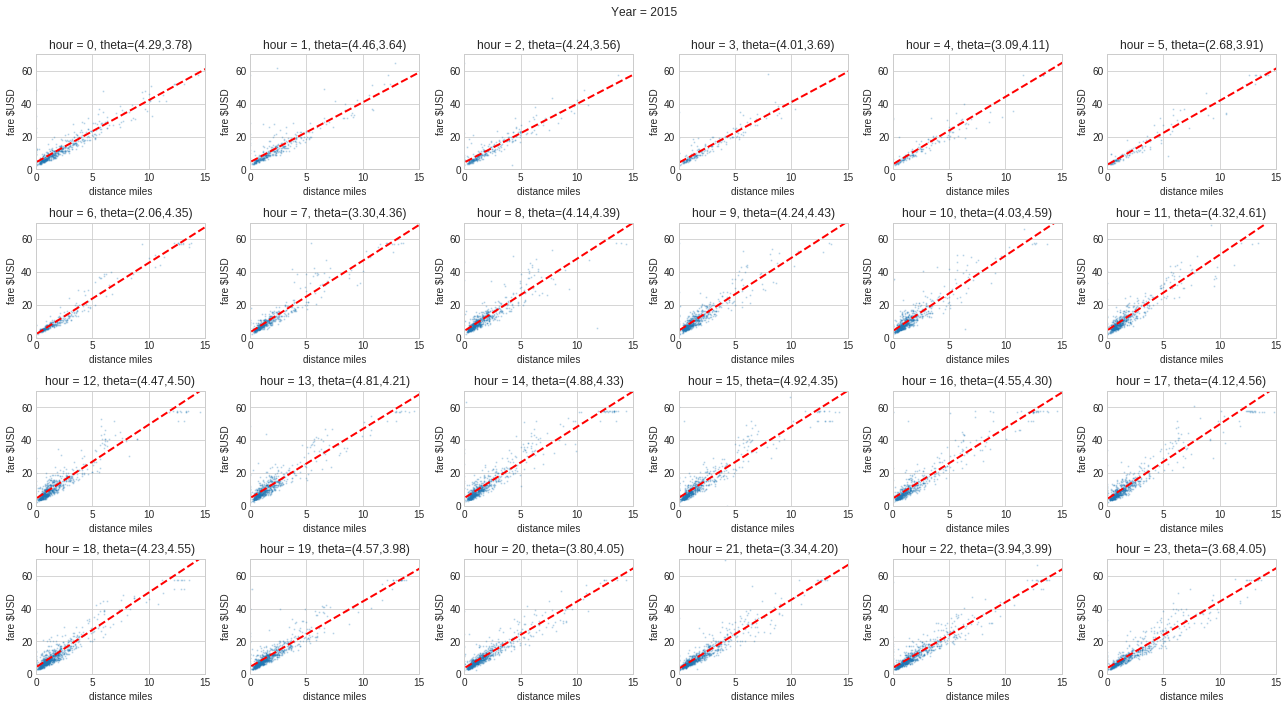

In [0]:
from sklearn.linear_model import LinearRegression

# plot all years
for year in train.Year.unique():
    # create figure
    fig, axs = plt.subplots(4, 6, figsize=(18, 10))
    axs = axs.ravel()
    
    # plot for all hours
    for h in range(24):
        idx = (train.distance_miles < 15) & (train.fare_amount < 100) & (train.Hour == h) & \
              (train.Year == year)
        axs[h].scatter(train[idx].distance_miles, train[idx].fare_amount, alpha=0.2, s=1)
        axs[h].set_xlabel('distance miles')
        axs[h].set_ylabel('fare $USD')
        axs[h].set_xlim((0, 15))
        axs[h].set_ylim((0, 70))

        model = LinearRegression(fit_intercept=False)
        x, y = train[idx].distance_miles.values.reshape(-1,1), train[idx].fare_amount.values.reshape(-1,1)
        X = np.concatenate((np.ones(x.shape), x), axis=1)
        model.fit(X, y)
        xx = np.linspace(0.1, 25, 100)
        axs[h].plot(xx, model.coef_[0][0] + xx * model.coef_[0][1], '--', c='r', lw=2)
        axs[h].set_title('hour = {}, theta=({:0.2f},{:0.2f})'.format(h, model.coef_[0][0], model.coef_[0][1]))

    plt.suptitle("Year = {}".format(year))
    plt.tight_layout(rect=[0, 0, 1, 0.95]);

*We calculate per year and per hour the fare and do a linear regression. When investigating the plots, you clearly see the price increase over the years.*

In [0]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

In [0]:
LR.fit(train_features, train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
LRpredictions = LR.predict(test_features)
LRerrors = abs(LRpredictions - test_labels)
print('Mean Absolute Error:', "$",round(np.mean(LRerrors), 2))

Mean Absolute Error: $ 5.99


In [0]:
LRmape = 100 * (LRerrors / test_labels)
LRaccuracy = 100 - np.mean(LRmape)
print('Accuracy:', round(LRaccuracy, 2), '%.')

Accuracy: 32.39 %.


### *Random Forests*

In [0]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 250, random_state = 561)

In [0]:
rf.fit(train_features, train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
           oob_score=False, random_state=561, verbose=0, warm_start=False)

In [0]:
predictions = rf.predict(test_features)
errors = abs(predictions - test_labels)
print('Mean Absolute Error:', "$",round(np.mean(errors), 2))

Mean Absolute Error: $ 1.96


In [0]:
# Calculate mean absolute percentage error (MAPE) and Accuracy
mape = 100 * (errors / test_labels)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 73.66 %.


In [0]:
# Get numerical feature importances
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), attributes_list), 
             reverse=True))

Features sorted by their score:
[(0.7189, 'distance_miles'), (0.044, 'abs_diff_longitude'), (0.0422, 'dropoff_longitude'), (0.0282, 'dropoff_latitude'), (0.0256, 'pickup_longitude'), (0.0193, 'pickup_latitude'), (0.0193, 'abs_diff_latitude'), (0.0184, 'Date'), (0.0144, 'Month'), (0.0143, 'year'), (0.0141, 'Year'), (0.0119, 'hour'), (0.0117, 'Hour'), (0.0064, 'weekday'), (0.0064, 'Day of Week'), (0.005, 'passenger_count')]


### *Neural Network*

---

In [0]:
from sklearn.neural_network import MLPRegressor
NeuralNet = MLPRegressor(hidden_layer_sizes=50)

In [0]:
NeuralNet.fit(train_features, train_labels)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=50, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [0]:
predictions = NeuralNet.predict(test_features)
errors = abs(predictions - test_labels)
print('Mean Absolute Error:', "$",round(np.mean(errors), 2))

Mean Absolute Error: $ 2.47


In [0]:
# Calculate mean absolute percentage error (MAPE) and Accuracy
mape = 100 * (errors / test_labels)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 71.95 %.


### *Gradient Boosted Models*

---

In [0]:
"""Preprocessing and metrics"""
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

"""Regressors"""
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
% matplotlib inline

In [0]:
data = pd.read_csv("/content/drive/Team Drives/IDS 561 - Big Data Group Project/train_new.csv")

In [0]:
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1.957918e+06,1.957918e+06,1.957918e+06,1.957918e+06,1.957918e+06,1.957918e+06
mean,1.132928e+01,-7.397514e+01,4.075107e+01,-7.397426e+01,4.075142e+01,1.684245e+00
std,9.713906e+00,3.858103e-02,2.958857e-02,3.776676e-02,3.275627e-02,1.306709e+00
min,0.000000e+00,-7.448963e+01,4.050005e+01,-7.449105e+01,4.050005e+01,0.000000e+00
25%,6.000000e+00,-7.399229e+01,4.073654e+01,-7.399160e+01,4.073553e+01,1.000000e+00
50%,8.500000e+00,-7.398210e+01,4.075334e+01,-7.398062e+01,4.075383e+01,1.000000e+00
75%,1.250000e+01,-7.396834e+01,4.076752e+01,-7.396536e+01,4.076839e+01,2.000000e+00
max,5.000000e+02,-7.281783e+01,4.169685e+01,-7.281783e+01,4.171463e+01,9.000000e+00


In [0]:
data.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [0]:
print('Size with nulls (train): %d' % len(data))
data = data.dropna(how = 'any', axis = 'rows')
print('Size without nulls (train): %d' % len(data))

Size with nulls (train): 1957918
Size without nulls (train): 1957918


#### Removing fake fares

In [0]:
k = 0
for i in data.fare_amount:
    if i < 0:
        k += 1
print("Number of fake fares: ", k)

Number of fake fares:  0


In [0]:
print('Length of original data: %d' % len(data))
data = data[data.fare_amount>=0]
print('Lengh of new data: %d' % len(data))

Length of original data: 1957918
Lengh of new data: 1957918


#### Adding new features

In [0]:
data['lon_change'] = abs(data.dropoff_longitude - data.pickup_longitude)
data['lat_change'] = abs(data.dropoff_latitude - data.pickup_latitude)

features_train  = ['pickup_longitude',
               'pickup_latitude',
               'dropoff_longitude',
               'dropoff_latitude',
               'lat_change',
               'lon_change']

In [0]:
Y = data.fare_amount.as_matrix()
X = data[features_train]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [0]:
Y = np.reshape(Y,(Y.shape[0],1))

In [0]:
X.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,lat_change,lon_change
0,-73.844311,40.721319,-73.841610,40.712278,0.009041,0.002701
1,-74.016048,40.711303,-73.979268,40.782004,0.070701,0.036780
2,-73.982738,40.761270,-73.991242,40.750562,0.010708,0.008504
3,-73.987130,40.733143,-73.991567,40.758092,0.024949,0.004437
4,-73.968095,40.768008,-73.956655,40.783762,0.015754,0.011440


#### Scaling the Y vector

In [0]:
min_max_scaler = preprocessing.MinMaxScaler()
Y = min_max_scaler.fit_transform(Y)

#### Prepping data for GBM and Regression Modules

In [0]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.33, random_state=42)

In [0]:
class Regressors:
    def __init__(self, Xtrain, Xtest, Ytrain, Ytest):
        """Initializing"""
        self.Xtrain = Xtrain
        self.Xtest = Xtest
        self.Ytrain = Ytrain
        self.Ytest = Ytest

    def def_xgboost(self, estimators):
        """Defining the XGBoosting regressor"""
        xgb_ = xgb.XGBRegressor(objective ='reg:linear', learning_rate=0.01, max_depth=3, n_estimators=estimators)
        xgb_.fit(self.Xtrain, self.Ytrain)
        pred = xgb_.predict(self.Xtest)
        
        return pred

    def def_RandomForestRegressor(self, estimators):
        """Defining the Random Forest Regeressor"""
        rfr_ = RandomForestRegressor(n_estimators=estimators, max_depth=3)
        rfr_.fit(self.Xtrain, self.Ytrain)
        pred = rfr_.predict(self.Xtest)

        return pred

    def def_GradientBoostingRegressor(self, estimators):
        """Defining the Gradient Boosting Regressor"""
        gbr_ = GradientBoostingRegressor(n_estimators=estimators, max_depth=3)
        gbr_.fit(self.Xtrain, self.Ytrain)
        pred = gbr_.predict(self.Xtest)

        return pred

    def def_AdaBoostRegressor(self, estimators):
        """Defining Ada Boosting Regressor"""
        abr_ = AdaBoostRegressor(n_estimators=estimators)
        abr_.fit(self.Xtrain, self.Ytrain)
        pred = abr_.predict(self.Xtest)

        return pred

In [0]:
def def_metrics(ypred):
    mae = mean_absolute_error(Ytest, ypred)
    mse = mean_squared_error(Ytest, ypred)

    return mae, mse

def plot_performance(plot_name, loss_mae, loss_mse):
    steps = np.arange(50, 500, 50)
    plt.style.use('ggplot')
    plt.title(plot_name)
    plt.plot(steps, loss_mae, linewidth=3, label="MAE")
    plt.plot(steps, loss_mse, linewidth=3, label="MSE")
    plt.legend()
    plt.ylabel("Loss")
    plt.xlabel("Number of estimators")
    plt.show()

In [0]:
"""Initializing the class"""
model = Regressors(Xtrain, Xtest, Ytrain, Ytest)

#### XGBoost and Gradient Boosting

XGBoosting Regressor
Number of estimators: 50
MAE:  0.2888066804320755
MSE:  0.08360504818876756
Number of estimators: 100
MAE:  0.17475931468397607
MSE:  0.030663107493698515
Number of estimators: 150
MAE:  0.10579375803818994
MSE:  0.0112804596279712
Number of estimators: 200
MAE:  0.06416962520016152
MSE:  0.004182987766296976
Number of estimators: 250
MAE:  0.03909705000145487
MSE:  0.001582574581406642
Number of estimators: 300
MAE:  0.024044114222322877
MSE:  0.0006292596962297839
Number of estimators: 350
MAE:  0.015165080139953957
MSE:  0.00027920448862729495
Number of estimators: 400
MAE:  0.010128313591601434
MSE:  0.0001503723305430472
Number of estimators: 450
MAE:  0.00738883652909441
MSE:  0.00010273934153811595


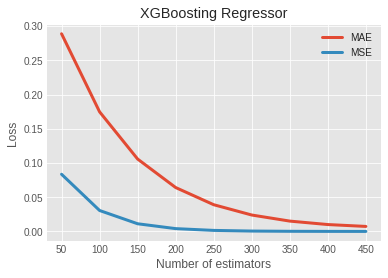

In [0]:
plot_name="XGBoosting Regressor"
loss_mae, loss_mse = [], []
print(plot_name)
for est in range(50,500,50):
    print("Number of estimators: %d" % est)
    mae, mse = def_metrics(model.def_xgboost(estimators = est))
    print("MAE: ", mae)
    print("MSE: ", mse)
    loss_mae.append(mae)
    loss_mse.append(mse)
plot_performance(plot_name, loss_mae, loss_mse)

Gradient Boosting Regressor
Number of estimators: 50
MAE:  0.2888066804320755
MSE:  0.08360504818876756
Number of estimators: 100
MAE:  0.17475931468397607
MSE:  0.030663107493698515
Number of estimators: 150
MAE:  0.10579375803818994
MSE:  0.0112804596279712
Number of estimators: 200
MAE:  0.06416962520016152
MSE:  0.004182987766296976
Number of estimators: 250
MAE:  0.03909705000145487
MSE:  0.001582574581406642
Number of estimators: 300
MAE:  0.024044114222322877
MSE:  0.0006292596962297839
Number of estimators: 350
MAE:  0.015165080139953957
MSE:  0.00027920448862729495
Number of estimators: 400
MAE:  0.010128313591601434
MSE:  0.0001503723305430472
Number of estimators: 450
MAE:  0.00738883652909441
MSE:  0.00010273934153811595


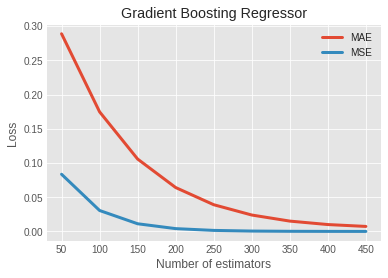

In [0]:
plot_name="Gradient Boosting Regressor"
loss_mae, loss_mse = [], []
print(plot_name)
for est in range(50,500,50):
    print("Number of estimators: %d" % est)
    mae, mse = def_metrics(model.def_xgboost(estimators = est))
    print("MAE: ", mae)
    print("MSE: ", mse)
    loss_mae.append(mae)
    loss_mse.append(mse)
plot_performance(plot_name, loss_mae, loss_mse)